In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go

In [2]:
# Color palette
# matplotlib and seaborn
plt.rcParams.update({
    'axes.facecolor': '#FFF9ED',        # background color
    'figure.facecolor': '#FFF9ED',      # Figure face color
    'grid.color': 'white',              # grid color
    'axes.edgecolor': '#682F2F',          # axes color
    'axes.labelcolor': '#682F2F',       # label color
    'xtick.color': '#682F2F',           # xtick color
    'ytick.color': '#682F2F',           # ytick color
    'axes.grid': True,                  # enable grid
    'axes.titlesize': 14,               # title size
    'axes.titleweight': 'bold',         # title weight
    'axes.titlecolor':'#682F2F',        # title color
    'axes.labelsize': 12,               # label size
    'axes.labelweight': 'bold',         # label weight
    'font.family': 'serif',             # font family
    'font.size': 12,                    # default font size
})

#plotly
# Customizing plotly plot style
cus_layout = go.Layout(
    plot_bgcolor='#FFF9ED',     # background color
    paper_bgcolor='#FFF9ED',    # plot area background color
    font=dict(
        family='serif',         # font family
        size=12,                # default font size
        color='#682F2F'           # font color
    ),
    xaxis=dict(
        gridcolor='white',      # x-axis grid color
        tickcolor='#682F2F'       # x-axis tick color
    ),
    yaxis=dict(
        gridcolor='white',      # y-axis grid color
        tickcolor='#682F2F'       # y-axis tick color
    ),
    title=dict(
        x = 0.5,
        y = 0.95,
        font=dict(
            size=14,            # title size
            color='#682F2F',      # title color
            family='serif',     # title font family
            weight='bold',      # title font weight
        )
    )
)

In [3]:
# Importing Data
df = pd.read_csv('../data/SBAnational.csv', low_memory=False)

In [4]:
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
858899,9232123000,S & O REPAIR,WORCESTER,MA,1602,PEOPLE'S UNITED BANK,CT,811111,29-Apr-96,1996,...,0,N,NaN,30-Sep-96,"$165,000.00",$0.00,P I F,$0.00,"$165,000.00","$123,750.00"
649714,6514094005,"KMS REALTY, LLC",ARKADELPHIA,AR,71923,SIX BRIDGES CAP. CORP,AR,721110,23-Jul-03,2003,...,N,N,NaN,17-Mar-04,"$742,000.00",$0.00,P I F,$0.00,"$751,000.00","$751,000.00"
36462,1278675003,PHYLLIS PORCASE DBA TOEY'S TAV,YOUNGSTOWN,OH,44502,CITIZENS BANK NATL ASSOC,RI,722110,22-Apr-05,2005,...,N,N,5-Oct-09,31-May-05,"$36,000.00",$0.00,CHGOFF,"$16,175.00","$36,000.00","$18,000.00"
716438,7456944006,ROSANE CRUZ dba EZ-4 US CHILD,WORCESTER,MA,1605,CITIZENS BANK NATL ASSOC,RI,624410,21-May-04,2004,...,Y,N,23-Aug-12,30-Nov-04,"$40,628.00",$0.00,CHGOFF,"$19,910.00","$20,000.00","$10,000.00"
888549,9773124010,ELECTRIC-GATE STORE INC,SAN FERNANDO,CA,91340,NATIONAL BANK OF CALIFORNIA,CA,238290,25-Jan-06,2006,...,0,N,NaN,28-Feb-06,"$1,717,000.00",$0.00,P I F,$0.00,"$1,717,000.00","$1,287,750.00"


## 1. Basic Information

In [5]:
print("There are {:,} obseravations and {} features in the dfset.".format(df.shape[0], df.shape[1]))
print(f'There are {len(df.select_dtypes(exclude=["object"]).columns)} Numerical features and {len(df.select_dtypes(include=["object"]).columns)} Categorical features in the dfset.')

There are 899,164 obseravations and 27 features in the dfset.
There are 10 Numerical features and 17 Categorical features in the dfset.


In [6]:
# feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [7]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

### 1.1 Summary Statistics of Numerical Features

In [8]:
df.describe().T.round(3).style.applymap(lambda val: 'background-color: {}'.format('white' if val == 0 else 'lightyellow' 
                                                                             if val <= 10 else 'lightgreen' 
                                                                             if val <= 100 else 'lightblue' 
                                                                             if val <= 1000 else 'lightcoral' 
                                                                             if val <= 1000000 else 'purple')).format(precision=3)

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.000,4772612310.594,2538175037.453,1000014003.000,2589757508.500,4361439006.000,6904626504.750,9996003010.000
Zip,899164.000,53804.391,31184.159,0.000,27587.000,55410.000,83704.000,99999.000
NAICS,899164.000,398660.950,263318.313,0.000,235210.000,445310.000,561730.000,928120.000
Term,899164.000,110.773,78.857,0.000,60.000,84.000,120.000,569.000
NoEmp,899164.000,11.411,74.108,0.000,2.000,4.000,10.000,9999.000
NewExist,899028.000,1.280,0.452,0.000,1.000,1.000,2.000,2.000
CreateJob,899164.000,8.430,236.688,0.000,0.000,0.000,1.000,8800.000
RetainedJob,899164.000,10.797,237.121,0.000,0.000,1.000,4.000,9500.000
FranchiseCode,899164.000,2753.726,12758.019,0.000,1.000,1.000,1.000,99999.000
UrbanRural,899164.000,0.758,0.646,0.000,0.000,1.000,1.000,2.000


### 1.2 Summary Statistics of Categorical Features

In [9]:
df.select_dtypes(include=["object"]).describe().style.apply(
    lambda x: ['background-color: lightblue' if x.name == 'count' else
               'background-color: lightgreen' if x.name == 'unique' else
               'background-color: lightcoral' if x.name == 'top' else
               'background-color: lightyellow' if x.name == 'freq' else ''
               for _ in x], axis=1
)

,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
count,899150,899134,899150,897605,897598,899164,899164,894636,896582,162699,896796,899164,899164,897167,899164,899164,899164
unique,779583,32581,51,5802,56,9859,52,18,8,6448,8472,118859,15,2,83165,22128,38326
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,7-Jul-93,2005,N,N,13-Mar-10,31-Jul-95,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"
freq,1269,11558,130619,86853,118116,1131,77525,420288,782822,734,10371,43787,899150,739609,737152,69394,49579


## 2. Data Cleaning & Processing

### 2.1 Handling Features 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [11]:
# find symbols
regex_pattern = r'[^0-9a-zA-Z]'

def find_symbols(cols, regex_pattern):
    for col in cols:
        symbs = []
        for s in df[col]:
            s = str(s)
            sym = re.findall(regex_pattern, s)
            symbs.extend(sym)
        if symbs:
            symbs_str = ', '.join(set(symbs))
            print(f'Column: {col} ==> {symbs_str}')

In [12]:
find_symbols(df.select_dtypes(include=['object']).columns, regex_pattern)

Column: Name ==> ,, ', >, &, (, ", #, ;, _, ), \, ., ], ?, +, ^, -, <, $, /, !, =, `, @, [, %, :, *,  
Column: City ==> `, @, [, ,, ^, -, ', ;, :, ), *, /, ., (, &, \, #,  
Column: Bank ==> +, ,, %, -, ', :, ), /, *, ., &, (, #,  
Column: ApprovalDate ==> -
Column: RevLineCr ==> ,, -, `, .
Column: ChgOffDate ==> -
Column: DisbursementDate ==> -
Column: DisbursementGross ==> ,, $, .,  
Column: BalanceGross ==> ,, $, .,  
Column: MIS_Status ==>  
Column: ChgOffPrinGr ==> ,, $, .,  
Column: GrAppv ==> ,, $, .,  
Column: SBA_Appv ==> ,, $, .,  


In [13]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalDate',
       'ApprovalFY', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

#### 2.1.1 Handling monetary features (DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv)

In [14]:
df['DisbursementGross'].value_counts()

DisbursementGross
$50,000.00        43787
$100,000.00       36714
$25,000.00        27387
$150,000.00       23373
$10,000.00        21328
                  ...  
$143,118.00           1
$23,827.00            1
$157,338.00           1
$60,698.00            1
$1,086,300.00         1
Name: count, Length: 118859, dtype: int64

In [15]:
#remove , $ and ' '

In [16]:
def remove_symbols(cols):
    for col in cols:
        df[col] = df[col].str.replace('$', '').str.replace(',', '').str.replace(' ', '')

In [17]:
cols = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr' , 'GrAppv', 'SBA_Appv']
remove_symbols(cols)

In [18]:
df['DisbursementGross'].value_counts()

DisbursementGross
50000.00      43787
100000.00     36714
25000.00      27387
150000.00     23373
10000.00      21328
              ...  
143118.00         1
23827.00          1
157338.00         1
60698.00          1
1086300.00        1
Name: count, Length: 118859, dtype: int64

In [19]:
df['DisbursementGross'].dtype

dtype('O')

In [20]:
# convert to float
for col in cols:
    df[col] = df[col].astype('float64')

In [21]:
df[cols].describe().T.round(3).style.applymap(lambda val: 'background-color: {}'.format('white' if val == 0 else 'lightyellow' 
                                                                             if val <= 10 else 'lightgreen' 
                                                                             if val <= 100 else 'lightblue' 
                                                                             if val <= 1000 else 'lightcoral' 
                                                                             if val <= 1000000 else 'purple')).format(precision=3)

,count,mean,std,min,25%,50%,75%,max
DisbursementGross,899164.000,201154.017,287640.850,0.000,42000.000,100000.000,238000.000,11446325.000
BalanceGross,899164.000,2.989,1442.162,0.000,0.000,0.000,0.000,996262.000
ChgOffPrinGr,899164.000,13503.295,65152.293,0.000,0.000,0.000,0.000,3512596.000
GrAppv,899164.000,192686.976,283263.391,200.000,35000.000,90000.000,225000.000,5472000.000
SBA_Appv,899164.000,149488.788,228414.562,100.000,21250.000,61250.000,175000.000,5472000.000


#### 2.1.2 Handling Date features (ApprovalDate, DisbursementDate)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [23]:
df['ApprovalDate'].head(2)

0    28-Feb-97
1    28-Feb-97
Name: ApprovalDate, dtype: object

In [24]:
df['DisbursementDate'].head(2)

0    28-Feb-99
1    31-May-97
Name: DisbursementDate, dtype: object

In [25]:
# convert 'ApprovalDate', 'DisbursementDate' to date type
date_cols = ['ApprovalDate', 'DisbursementDate']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')

#### 2.1.3 ApprovalFY

In [26]:
# ApprovalFY
df['ApprovalFY'].dtype

dtype('O')

In [27]:
# ApprovalFY
df['ApprovalFY'].value_counts()

ApprovalFY
2005     77525
2006     76040
2007     71876
2004     68290
2003     58193
1995     45758
2002     44391
1996     40112
2008     39540
1997     37748
2000     37381
1999     37363
2001     37350
1998     36016
1994     31598
1993     23305
1992     20885
2009     19126
2010     16848
1991     15666
1990     14859
1989     13248
2011     12608
2012      5997
2013      2458
1987      2218
1986      2118
1984      2022
1985      1944
1988      1898
1983      1684
1982       719
1981       630
1980       477
1979       352
2014       268
1978       242
1977       137
1976        66
1973        52
1974        42
1975        30
1972        27
1971        20
1976A       18
1970         8
1969         4
1967         2
1968         2
1965         1
1966         1
1962         1
Name: count, dtype: int64

In [28]:
# remove 'A'
df['ApprovalFY'].replace('1976A', 1976, inplace=True)

In [29]:
df['ApprovalFY'] = df['ApprovalFY'].astype(int)

#### 2.1.4 LoanNr_Chkgt, Name

In [30]:
# no need these columns --> drop
df.drop(['LoanNr_ChkDgt', 'Name'], axis=1, inplace=True)

#### 2.1.5 City, State, Zip

In [31]:
print(f'Unique Cities : {df["City"].nunique()} | Dtype : {df["City"].dtype}\nUnique States : {df["State"].nunique()}    | Dtype : {df["State"].dtype}\nUnique Zip    : {df["Zip"].nunique()} | Dtype : {df["Zip"].dtype}')

Unique Cities : 32581 | Dtype : object
Unique States : 51    | Dtype : object
Unique Zip    : 33611 | Dtype : int64


#### 2.1.6 Bank, BankState

In [32]:
df[['Bank', 'BankState']].head(2)

,Bank,BankState
0,FIFTH THIRD BANK,OH
1,1ST SOURCE BANK,IN


In [33]:
df['BankState'].nunique()

56

In [34]:
df['Bank'].nunique()

5802

#### 2.1.7 Term

In [35]:
df['Term'].head(2)

0    84
1    60
Name: Term, dtype: int64

#### 2.1.8 MIS_Status

In [36]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

#### 2.1.9 LowDoc

In [37]:
df['LowDoc'].value_counts()

LowDoc
N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: count, dtype: int64

In [38]:
### LowDoc Loan Program: Y = Yes, N = No Only. Others (0, C, S, A, R, 1) are incompatible. --> replace with NA
df['LowDoc'].replace(['0','C', 'S', 'A', 'R', '1'], np.nan, inplace=True)

In [39]:
df['LowDoc'].value_counts()

LowDoc
N    782822
Y    110335
Name: count, dtype: int64

#### 2.2.10 NoEmp

In [40]:
df['NoEmp'].dtype

dtype('int64')

#### 2.2.11 NewExit

In [41]:
df['NewExist'].value_counts()

NewExist
1.0    644869
2.0    253125
0.0      1034
Name: count, dtype: int64

#### 2.2.12 CreateJob

In [42]:
df['CreateJob'].value_counts()

CreateJob
0      629248
1       63174
2       57831
3       28806
4       20511
        ...  
171         1
146         1
214         1
179         1
860         1
Name: count, Length: 246, dtype: int64

In [43]:
## Cronverting 'CreateJob' to new binary variable to find whether a new job is created or not 
## If CreateJob is 0 ==> No new job created - 0 
## else Createjob > 0 ==> New job created - 1 
## Remove 'CreateJob'
df['IsJobCreated'] =df['CreateJob'].apply(lambda x: 'Y' if x > 0 else 'N')
df['IsJobCreated'].value_counts()

IsJobCreated
N    629248
Y    269916
Name: count, dtype: int64

In [44]:
df.drop(['CreateJob'], axis=1, inplace=True)

#### 2.2.13 RetainedJob 

In [45]:
df['RetainedJob'].value_counts()

RetainedJob
0      440403
1       88790
2       76851
3       49963
4       39666
        ...  
191         1
247         1
226         1
675         1
198         1
Name: count, Length: 358, dtype: int64

In [46]:
## Cronverting 'RetainedJob' to new binary variable to find whether job is retained or not 
## If RetainedJob is 0 ==> job not retained - 'N' 
## else RetainedJob > 0 ==> job in retained - 'Y'
## drop 'RetainedJob'
df['IsJobRetained'] =df['RetainedJob'].apply(lambda x: 'Y' if x > 0 else 'N')
df['IsJobRetained'].value_counts()

IsJobRetained
Y    458761
N    440403
Name: count, dtype: int64

In [47]:
df.drop(['RetainedJob'], axis=1, inplace=True)

#### 2.2.14 FranchiseCode

In [48]:
df['FranchiseCode'].value_counts()

FranchiseCode
1        638554
0        208835
78760      3373
68020      1921
50564      1034
          ...  
24421         1
61615         1
81580         1
83876         1
15930         1
Name: count, Length: 2768, dtype: int64

In [49]:
# Franchise code, (00000 or 00001) = No franchise , then others should be franchise
# new column ==> 'IsFranchised' = 'N' , if 0 or 1
# 'IsFranchised' = 'Y'  for all other values
df['IsFranchised'] = df['FranchiseCode'].apply(lambda x: 'N' if x in [0, 1] else 'Y')
df['IsFranchised'].value_counts()

IsFranchised
N    847389
Y     51775
Name: count, dtype: int64

In [50]:
df.drop(['FranchiseCode'], axis=1, inplace=True)

#### 2.2.15 UrbanRural

In [51]:
df['UrbanRural'].value_counts()

UrbanRural
1    470654
0    323167
2    105343
Name: count, dtype: int64

In [52]:
# 1 = Urban, 2 = rural, 0 = undefined

#### 2.2.16 RevLineCr

In [53]:
df['RevLineCr'].value_counts()

RevLineCr
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

In [54]:
# Revolving line of credit: Y = Yes, N = No, Others incompatible

In [55]:
df['RevLineCr'].replace({'Y':'Y', '1':'Y', 'N':'N', '0':'N',r'[^YN]':np.nan}, regex = True, inplace=True)

In [56]:
df['RevLineCr'].value_counts()

RevLineCr
N    677890
Y    201420
Name: count, dtype: int64

#### 2.2.17 NAICS

In [57]:
naics = pd.read_csv('../data/NAICS.csv')

In [58]:
naics

,Sector,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,21,"Mining, quarrying, and oil and gas extraction"
2,22,Utilities
3,23,Construction
4,31-33,Manufacturing
5,42,Wholesale trade
6,44-45,Retail trade
7,48-49,Transportation and warehousing
8,51,Information
9,52,Finance and insurance


In [59]:
df['NAICS'].sample(5)

510404         0
779730         0
421438    812310
677658    423610
663897    447190
Name: NAICS, dtype: int64

In [60]:
#SectorId 
df['SectorCode'] = df['NAICS'].astype(str).str[:2].astype('int')

In [61]:
def get_sectorDesc(id):
    for idx, row in naics.iterrows():
        sec_code = str(row['Sector'])
        sec_des = row['Description']
        
        if '-' in sec_code:
            st, et = sec_code.split('-')
            st = int(st)
            et = int(et)
            if st <= id <= et:
                return sec_des
        else:
            if int(sec_code) == id:
                return sec_des

In [62]:
df['SectorDesc'] = df['SectorCode'].apply(get_sectorDesc)

In [63]:
df[['NAICS','SectorCode', 'SectorDesc']].head(5)

,NAICS,SectorCode,SectorDesc
0,451120,45,Retail trade
1,722410,72,Accommodation and food services
2,621210,62,Health care and social assistance
3,0,0,None
4,0,0,None


In [64]:
df.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'IsJobCreated', 'IsJobRetained', 'IsFranchised', 'SectorCode',
       'SectorDesc'],
      dtype='object')

In [65]:
df['SectorDesc'].isna().sum()

201948

In [66]:
len(df[df['NAICS']==0])

201948

In [67]:
## 0 are count as null

In [68]:
## Sector_Rate

In [69]:
sec_rate = pd.read_csv('../data/SectorRate.csv')

In [70]:
sec_rate.sample(10)

,2 digit code,Description,Default rate (%)
16,51,Information,25
6,54,"Professional, scientific, and technical services",19
1,11,"Agriculture, forestry, fishing and hunting",9
4,22,Utilities,14
2,55,Management of companies and enterprises,10
0,21,"Mining, quarrying, and oil and gas extraction",8
19,53,Real estate and rental and leasing,29
5,92,Public administration,15
7,42,Wholesale trade,19
12,44-45,Retail trade,"22, 23"


In [71]:
# mapping rates
rate_mapping = {}
for _, row in sec_rate.iterrows():
    codes = row['2 digit code']
    rate = row['Default rate (%)']
    
    if '-' in codes:
        st, ed = map(int, codes.split('-'))
        rates = list(map(int, rate.split(',')))
        for i, code in enumerate(range(st, ed+1)):
            rate_mapping[code] = rates[i] / 100.0
    else:
        rate_mapping[int(codes)] = int(rate)/ 100.0

In [72]:
rate_mapping

{21: 0.08,
 11: 0.09,
 55: 0.1,
 62: 0.1,
 22: 0.14,
 92: 0.15,
 54: 0.19,
 42: 0.19,
 31: 0.19,
 32: 0.16,
 33: 0.14,
 81: 0.2,
 71: 0.21,
 72: 0.22,
 44: 0.22,
 45: 0.23,
 23: 0.23,
 56: 0.24,
 61: 0.24,
 51: 0.25,
 48: 0.27,
 49: 0.23,
 52: 0.28,
 53: 0.29}

In [73]:
df['SectorRate'] = df['SectorCode'].map(rate_mapping)

In [74]:
df[['NAICS','SectorCode', 'SectorDesc', 'SectorRate']].head(5)

,NAICS,SectorCode,SectorDesc,SectorRate
0,451120,45,Retail trade,0.23
1,722410,72,Accommodation and food services,0.22
2,621210,62,Health care and social assistance,0.10
3,0,0,None,NaN
4,0,0,None,NaN


#### 2.2.18 Additional Variables according to the Guidelines

##### 2.2.18.1 New

In [75]:
## New = =1 if NewExist=2 (New Business), =0 if NewExist=1 (Existing Business)
# 1 = Existing business, 2 = New business, 0 - incompatible
# Additional var by guideline : reassigning Existing business= 0, New business = 1 and incompatible with NaN
df['New'] = df['NewExist'].replace({1.0:0,2.0:1,0.0:np.nan}).fillna(0).astype('int')

In [76]:
df.drop(['NewExist'], axis=1, inplace=True)

In [77]:
df['New'].value_counts()

New
0    646039
1    253125
Name: count, dtype: int64

##### 2.2.18.2 Portion

In [78]:
# Proportion of gross amount guaranteed by SBA
df['SBA_portion'] = np.where(df['GrAppv'] != 0, df['SBA_Appv'] / df['GrAppv'], np.nan)

##### 2.2.18.3 RealEstate

In [79]:
# =1 if loan is backed by real estate, =0 otherwise
# If loan term is 20 years or more than 20 years it is backed up with property, if less no 
df['RealEstate'] = df['Term'].apply(lambda x : 1 if x >= 240 else 0)

##### 2.2.18.4 Selected

In [80]:
# =1 if the df are selected as training df to build model for assignment, =0 if the df are selected as testing df to validate model

##### 2.2.18.5 Default

In [81]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [82]:
# 	=1 if MIS_Status=CHGOFF, =0 if MIS_Status=PIF
df['Default'] = df['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else (0 if x == 'P I F' else np.nan))

In [83]:
df['Default'].value_counts()

Default
0.0    739609
1.0    157558
Name: count, dtype: int64

##### 2.2.18.6 daysterm

In [84]:
# Extra variable generated when creating “Recession
# Convert Term in to days
df['DaysTerm'] = df['Term'] * 30

##### 2.2.18.7 xx

In [85]:
# Extra variable generated when creating “Recession
## xx = DaysTerm column with DisbursementDate
df['xx'] = df['DisbursementDate'] + pd.TimedeltaIndex(df['DaysTerm'], unit='D')

##### 2.2.18.8 Recession

In [86]:
df['DisbursementDate'].dtype

dtype('<M8[ns]')

In [87]:
# =1 if loan is active during Great Recession, =0 otherwise
# Recession is a period between a peak and a trough in the business cycle where there is a significant decline in 
# economic activity spread across the economy that can last from a few months to more than a year.
# recession period 1-12-2007 - 30-06-2009
s_dt = pd.Timestamp('2007-12-01').date()
e_dt = pd.Timestamp('2009-06-30').date()

df['Recession'] = df['xx'].apply(lambda x : 1 if pd.notna(x) and s_dt <= x.date() <= e_dt else 0)

#### 2.2.18.9 State Rate

In [88]:
# State Rate
df['State'].value_counts()

State
CA    130619
TX     70458
NY     57693
FL     41212
PA     35170
OH     32622
IL     29669
MA     25272
MN     24373
NJ     24035
WA     23263
GA     22277
WI     21040
MO     20678
CO     20605
MI     20545
UT     18776
AZ     17631
NC     14294
IN     14132
MD     13269
VA     13264
CT     12229
NH     12109
IA     11996
KS     11464
OR     11051
OK      9950
LA      9576
ID      9498
TN      9403
RI      9028
MT      8749
AL      8362
NV      8024
KY      7723
MS      7686
NE      6386
AR      6341
NM      6033
ME      5944
SC      5597
VT      5454
ND      5245
SD      4431
HI      3610
WV      3287
WY      2839
AK      2405
DE      2220
DC      1613
Name: count, dtype: int64

In [89]:
state_rates = df.groupby('State')['Default'].mean().round(1)

In [90]:
df['StateRate'] = df['State'].map(state_rates)

In [91]:
df[['State', 'StateRate']].sample(15)

,State,StateRate
87157,WI,0.1
156933,NJ,0.2
369877,CO,0.2
866136,IL,0.2
317861,IL,0.2
173473,MT,0.1
450686,GA,0.2
153730,RI,0.1
699155,CA,0.2
735920,NH,0.1


### 2.2 Handling missing values

In [92]:
print(f'There are total {df.isna().sum().sum()} values are missing in the df set.')

There are total 1178135 values are missing in the df set.


In [93]:
df.isna().sum()

City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
UrbanRural                0
RevLineCr             19854
LowDoc                 6007
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
IsJobCreated              0
IsJobRetained             0
IsFranchised              0
SectorCode                0
SectorDesc           201948
SectorRate           201948
New                       0
SBA_portion               0
RealEstate                0
Default                1997
DaysTerm                  0
xx                     2368
Recession                 0
StateRate                14
dtype: int64

In [94]:
miss_count = df.isna().sum()
miss_props = round((miss_count/ len(df))*100,4)
pd.DataFrame({
    'Column': miss_count.index,
    '# of Missing values': miss_count.values,
    'Proportion of Missing values': miss_props.map('{:.5f} %'.format).values
}).style.apply(lambda x: [
    'background-color: lightgreen' if float(val.rstrip('%')) < 10 else
    'background-color: yellow' if 10 <= float(val.rstrip('%')) <= 50 else
    'background-color: lightcoral' for val in x],
    subset=['Proportion of Missing values'])

,Column,# of Missing values,Proportion of Missing values
0,City,30,0.00330 %
1,State,14,0.00160 %
2,Zip,0,0.00000 %
3,Bank,1559,0.17340 %
4,BankState,1566,0.17420 %
5,NAICS,0,0.00000 %
6,ApprovalDate,0,0.00000 %
7,ApprovalFY,0,0.00000 %
8,Term,0,0.00000 %
9,NoEmp,0,0.00000 %


In [95]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [96]:
#MIS_Status
# Fill based on ChgOffDate, If the ChgOffDate = NA ==> MIS_Status = 'P I F' else MIS_Status = 'CHGOFF'
df['MIS_Status'] = np.where(df['ChgOffDate'].isna(), 'P I F', 'CHGOFF')

# Now Default and State_rates chages
df['Default'] = df['MIS_Status'].apply(lambda x: 1 if x == 'CHGOFF' else (0 if x == 'P I F' else np.nan))

state_rates = df.groupby('State')['Default'].mean().round(1)

df['StateRate'] = df['State'].map(state_rates)

In [97]:
df['Default'].value_counts()

Default
0    736465
1    162699
Name: count, dtype: int64

In [98]:
df[['MIS_Status', 'Default', 'StateRate']].isna().sum()

MIS_Status     0
Default        0
StateRate     14
dtype: int64

In [99]:
df[['State', 'StateRate']].sample(7)

,State,StateRate
804336,NM,0.1
770881,TX,0.2
25432,WA,0.1
24350,NY,0.2
465971,NH,0.1
254473,NV,0.2
481676,CA,0.2


In [100]:
# LowDoc
df['LowDoc'].value_counts()

LowDoc
N    782822
Y    110335
Name: count, dtype: int64

In [101]:
# Accoding to the guidelines if Loan (DisbursementGross) < 150,000 then LowDoc = 1 , else 0
df['LowDoc'] = np.where((df['LowDoc'].isna()) & (df['DisbursementGross'] < 150000), 'Y', df['LowDoc'])
df['LowDoc'] = np.where((df['LowDoc'].isna()) & (df['DisbursementGross'] >= 150000), 'N', df['LowDoc'])
df = df[(df['LowDoc'] == 'N') | (df['LowDoc'] == 'Y')]

In [102]:
df['LowDoc'].isna().sum()

0

In [103]:
df['LowDoc'].value_counts()

LowDoc
N    785228
Y    113936
Name: count, dtype: int64

In [104]:
# Now drop 'ChgOffDate' , bcz it's missing proportion is 82%
df.drop('ChgOffDate', axis=1, inplace=True)

In [105]:
# drop missing value columns with missing proportion is less than 10%
# SectorDesc and SectorRate columns miss 22.5% of data, This happens beacuse NAICS column contains value 0, which is not and industrycode assigned by NAICS association. Unfortunately there is no way to handle this.
df.dropna(inplace=True)

In [106]:
df.isna().sum().sum()

0

In [112]:
df.shape

(677685, 34)

<Figure size 400x400 with 0 Axes>

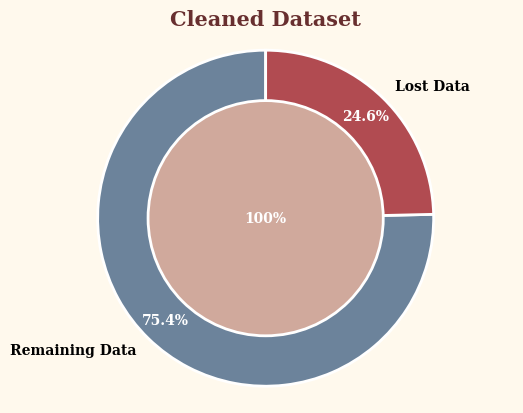

In [116]:
initial_df_size = 899164
cleaned_df_size = df.shape[0]
data_loss = (initial_df_size-cleaned_df_size)

plt.figure(figsize=(4,4))
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    [cleaned_df_size, data_loss], labels=['Remaining Data', 'Lost Data'], colors = [ '#6C839B', '#B14B51'],
    autopct=lambda p: '{:.1f}%'.format(p), textprops={'fontsize': 10, 'fontweight': 'bold', 'color':'black'}, startangle=90, pctdistance=0.85,
    wedgeprops=dict({'linewidth':2, 'edgecolor': 'white'})
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')
center = plt.Circle((0, 0), 0.7, fc='#D0A99C',linewidth=2)
fig.gca().add_artist(center)

plt.text(0,0, '100%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')
ax.axis('equal')
plt.title('Cleaned Dataset', fontweight='bold', fontsize=15)
sns.despine(left=True, bottom=True)
plt.savefig('../plots/EDA/CleanedDataset.png', dpi=300, bbox_inches='tight')
plt.show()

In [118]:
#export cleaned dataset
df.to_csv('../data/SBA_cleaned.csv',index=False)